In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np

from botocore import UNSIGNED
from botocore.config import Config

import matplotlib.pyplot as plt

from resloader.base import ResLoader

In [2]:
CACHE_DIR = '/Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache'

In [3]:
loader = ResLoader(
    cache_dir=CACHE_DIR,
    s3_config=Config(signature_version=UNSIGNED),
    sim_year='2022',
    sim_release='resstock_amy2018_release_1.1',
    sim_upgrade='0',
    sim_level='individual',
    sim_geo_agg='by_state',
)

nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/


In [4]:
df_spatial = loader.get_spatial_tract_lookups(raw=True)
sim_keys = loader.get_sim_keys()

loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/geographic_information/spatial_tract_lookup_table.csv from cache
loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/_staged/individual/by_state/0/sim_keys.parquet from cache


In [6]:
sample_key = sim_keys.sample(1)['key'].values[0]
profile = loader.get_load_profile(sample_key, add_weather=True)


downloading nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/timeseries_individual_buildings/by_state/upgrade=0/state=PA/545640-0.parquet from S3
loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/metadata/baseline.parquet from cache
loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1.1/_staged/weather_keys.parquet from cache
downloading nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_amy2018_release_1/weather/state=PA/G4201070_2018.csv from S3


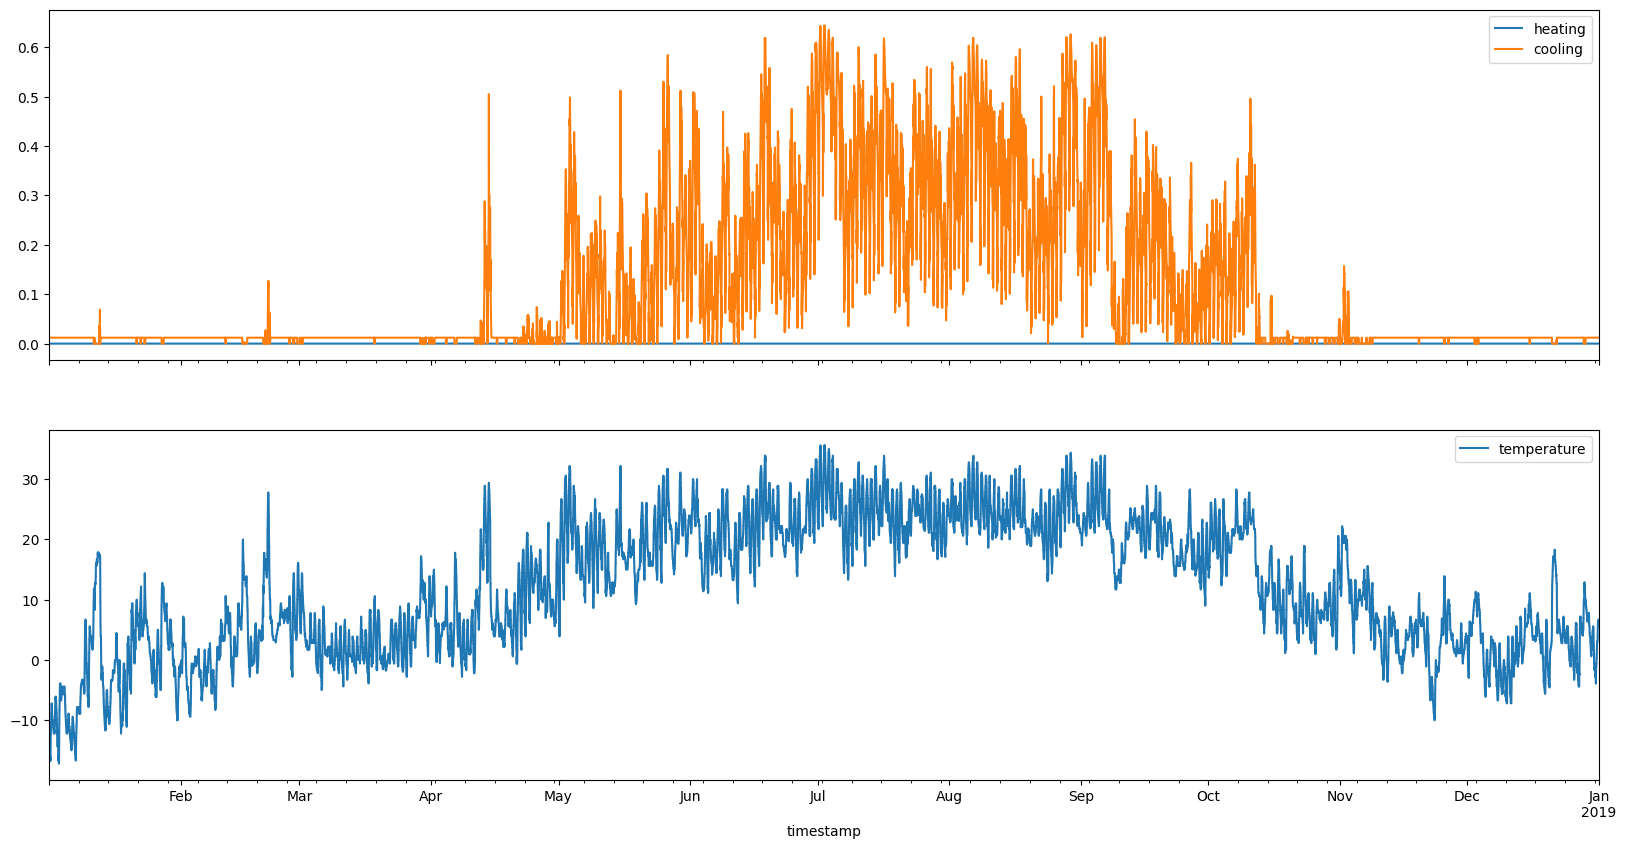

In [7]:
fig, ax = plt.subplots(2,1, figsize=(20, 10), sharex=True)
_ = profile[['heating', 'cooling']].plot(ax=ax[0])
_ = profile[['temperature']].plot(ax=ax[1])